In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv("Downloads\iris.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
X = data.iloc[:, [0,1,2, 3]].values
y = data.iloc[:, 4].values

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [28]:
X=data.drop('species',axis=1)
y=data['species']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test.shape)

(100, 4)
(100,)
(50,)
(50, 4)


In [31]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [32]:
y_train

96     versicolor
105     virginica
66     versicolor
0          setosa
122     virginica
          ...    
71     versicolor
106     virginica
14         setosa
92     versicolor
102     virginica
Name: species, Length: 100, dtype: object

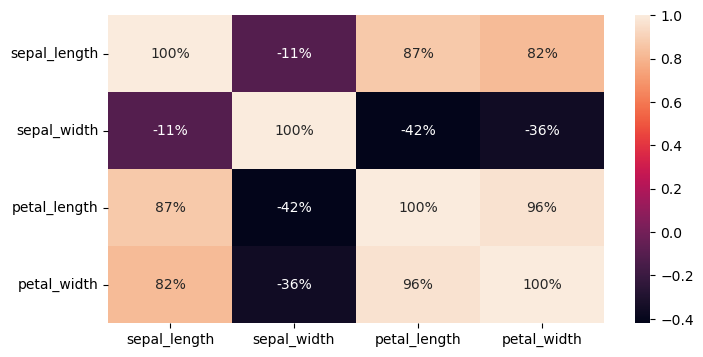

In [45]:
plt.figure(figsize=(8,4)) 
sns.heatmap(data.corr(),annot=True,fmt=".0%")
plt.show()

In [33]:
longres=LogisticRegression()

In [34]:
longres.fit(X_train,y_train)
y_pred=longres.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

1.0


In [63]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)

Precision: 1.0
Recall: 1.0


In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


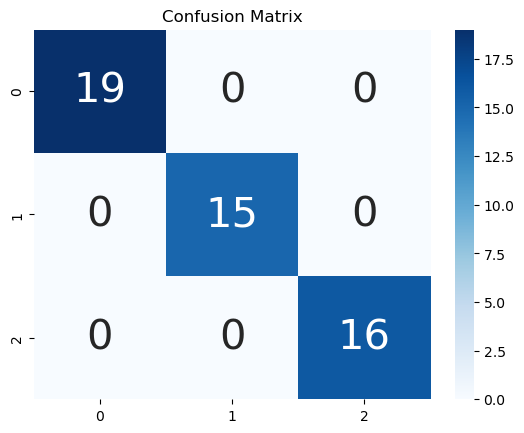

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [61]:
encoder = LabelEncoder()
data['species'] = encoder.fit_transform(data['species'])
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


			Classification report:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50
 



C:\Users\saman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


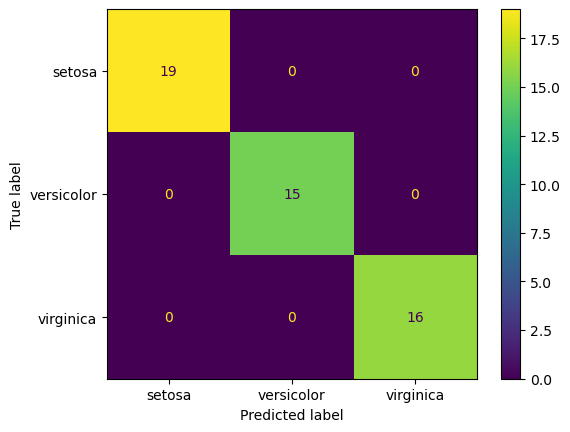

In [62]:
class_LR  = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred_LR = class_LR.predict(X_test)
class_rep_LR = classification_report(y_test, y_pred_LR)
print('\t\t\tClassification report:\n\n', class_rep_LR, '\n')
plot_confusion_matrix(class_LR, X_test, y_test) 
plt.show()